In [3]:
import opendatasets as od
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

1. **Anime 2023 CSV File**

In [5]:
anime_df = pd.read_csv("/content/myanimelist-dataset/anime-dataset-2023.csv")

In [ ]:
anime_df.sample(10)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
14642,38122,Zhu Zhu Xia: Jimu Shijie de Tonghua,GG Bond Season 5: Fairy Tales of the Brick Kin...,猪猪侠 积木世界的童话,UNKNOWN,"Fantasy, Sci-Fi","When GG Bond's grandfather, EE Bond, tries to ...",TV,52.0,Sep 2010 to ?,...,UNKNOWN,Original,15 min per ep,G - All Ages,14344.0,17912,0,UNKNOWN,256,https://cdn.myanimelist.net/images/anime/1250/...
6553,11597,Nisemonogatari,Nisemonogatari,偽物語,8.14,"Comedy, Mystery, Supernatural, Ecchi","Surviving a vampire attack, meeting several gi...",TV,11.0,"Jan 8, 2012 to Mar 18, 2012",...,Shaft,Light novel,25 min per ep,R - 17+ (violence & profanity),413.0,255,3851,420129.0,711311,https://cdn.myanimelist.net/images/anime/1044/...
16123,40559,TRAPxTRAP feat. Hatsune Miku,UNKNOWN,TRAP×TRAP feat. 初音ミク,5.58,UNKNOWN,Music video for TRAPxTRAP feat. Hatsune Miku b...,Music,1.0,"Jan 25, 2013",...,UNKNOWN,Original,3 min,G - All Ages,UNKNOWN,14159,0,314.0,619,https://cdn.myanimelist.net/images/anime/1528/...
8382,21167,Escha & Logy no Atelier: Tasogare no Sora no R...,UNKNOWN,エスカ&ロジーのアトリエ ～黄昏の空の錬金術士～,6.43,Fantasy,"This world has gone through many Dusks, and is...",TV,12.0,"Apr 10, 2014 to Jun 26, 2014",...,Studio Gokumi,Game,24 min per ep,PG-13 - Teens 13 or older,6740.0,2616,74,23740.0,61007,https://cdn.myanimelist.net/images/anime/2/617...
8388,21201,Teekyuu 2 Specials,Teekyu 2 Specials,てーきゅう 2,6.47,"Comedy, Sports",Short specials included in the Blu-ray release.,Special,2.0,"Oct 25, 2013",...,MAPPA,Manga,2 min per ep,PG-13 - Teens 13 or older,6538.0,5969,0,5830.0,10272,https://cdn.myanimelist.net/images/anime/12/56...
15512,39466,Jitaku Keibiin (2019),UNKNOWN,自宅警備員 (2019),6.36,Hentai,He is a private home security officer with 20 ...,OVA,4.0,"May 31, 2019 to Sep 27, 2019",...,Suzuki Mirano,Visual novel,16 min per ep,Rx - Hentai,UNKNOWN,7531,16,2323.0,5785,https://cdn.myanimelist.net/images/anime/1288/...
21789,50383,VERSEⁿ: Episodeⁿ - Kuusou,UNKNOWN,VERSEⁿ - Episodeⁿ | 空想,6.2,Fantasy,Animated promotion for VTuber project VERSEⁿ.,ONA,1.0,"Nov 12, 2021",...,Enishiya,Original,1 min,PG-13 - Teens 13 or older,7860.0,15047,0,199.0,487,https://cdn.myanimelist.net/images/anime/1678/...
18104,44420,Shaonian Shiye: Zhongyi Man Qiankun,UNKNOWN,少年师爷之忠义满乾坤,UNKNOWN,UNKNOWN,No description available for this anime.,TV,26.0,"Mar 24, 2016 to 2016",...,UNKNOWN,Original,14 min per ep,PG - Children,19543.0,22689,0,UNKNOWN,52,https://cdn.myanimelist.net/images/anime/1108/...
12592,34857,Everyday Affair,Everyday Affair,Everyday affair,5.4,UNKNOWN,An official music video for the song Everyday ...,Music,1.0,"Dec 28, 2015",...,UNKNOWN,Music,3 min,G - All Ages,UNKNOWN,17137,0,160.0,308,https://cdn.myanimelist.net/images/anime/11/84...
24882,55709,Boku to Roboko Movie,UNKNOWN,僕とロボコ 劇場版,UNKNOWN,"Comedy, Sci-Fi",The movie version of Boku to Roboko.,Movie,1.0,2024,...,UNKNOWN,Manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,17604,0,UNKNOWN,265,https://cdn.myanimelist.net/images/anime/1277/...


In [ ]:
anime_df.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL'],
      dtype='object')

In [ ]:
anime_df=anime_df[['anime_id','Name','English name','Score','Genres','Synopsis',
                   'Type','Episodes','Aired','Status','Rating','Rank',
                   'Popularity','Favorites','Scored By','Members','Image URL',
                   'Studios','Source']]

In [ ]:
anime_df.columns

Index(['anime_id', 'Name', 'English name', 'Score', 'Genres', 'Synopsis',
       'Type', 'Episodes', 'Aired', 'Status', 'Rating', 'Rank', 'Popularity',
       'Favorites', 'Scored By', 'Members', 'Image URL', 'Studios', 'Source'],
      dtype='object')

In [ ]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Score         24905 non-null  object
 4   Genres        24905 non-null  object
 5   Synopsis      24905 non-null  object
 6   Type          24905 non-null  object
 7   Episodes      24905 non-null  object
 8   Aired         24905 non-null  object
 9   Status        24905 non-null  object
 10  Rating        24905 non-null  object
 11  Rank          24905 non-null  object
 12  Popularity    24905 non-null  int64 
 13  Favorites     24905 non-null  int64 
 14  Scored By     24905 non-null  object
 15  Members       24905 non-null  int64 
 16  Image URL     24905 non-null  object
 17  Studios       24905 non-null  object
 18  Source        24905 non-null  object
dtypes: i

In [ ]:
missing_values = ['UNKNOWN', 'not given', 'not available', 'MISSING', 'missing', 'unknown',
                  'Missing','Unknown']
missing_counts = anime_df.apply(lambda col: col.isin(missing_values).sum())
print(missing_counts)

anime_id            0
Name                0
English name    14578
Score            9213
Genres           4929
Synopsis            0
Type               74
Episodes          611
Aired               0
Status              0
Rating            669
Rank             4612
Popularity          0
Favorites           0
Scored By        9213
Members             0
Image URL           0
Studios         10526
Source           3689
dtype: int64


In [ ]:
columns_to_convert = ['Score', 'Episodes', 'Rank', 'Scored By']
for col in columns_to_convert:
    if col in anime_df.columns:
        anime_df[col] = anime_df[col].replace(missing_values, 0).astype(float)
int_cols = anime_df.select_dtypes(include='int64').columns
anime_df[int_cols] = anime_df[int_cols].astype(float)
print(anime_df.dtypes)

anime_id        float64
Name             object
English name     object
Score           float64
Genres           object
Synopsis         object
Type             object
Episodes        float64
Aired            object
Status           object
Rating           object
Rank            float64
Popularity      float64
Favorites       float64
Scored By       float64
Members         float64
Image URL        object
Studios          object
Source           object
dtype: object


In [ ]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      24905 non-null  float64
 1   Name          24905 non-null  object 
 2   English name  24905 non-null  object 
 3   Score         24905 non-null  float64
 4   Genres        24905 non-null  object 
 5   Synopsis      24905 non-null  object 
 6   Type          24905 non-null  object 
 7   Episodes      24905 non-null  float64
 8   Aired         24905 non-null  object 
 9   Status        24905 non-null  object 
 10  Rating        24905 non-null  object 
 11  Rank          24905 non-null  float64
 12  Popularity    24905 non-null  float64
 13  Favorites     24905 non-null  float64
 14  Scored By     24905 non-null  float64
 15  Members       24905 non-null  float64
 16  Image URL     24905 non-null  object 
 17  Studios       24905 non-null  object 
 18  Source        24905 non-nu

In [ ]:
object_cols = anime_df.select_dtypes(include='object').columns
anime_df[object_cols] = anime_df[object_cols].replace(missing_values, 'UNKNOWN')
anime_df[object_cols].head()

,Name,English name,Genres,Synopsis,Type,Aired,Status,Rating,Image URL,Studios,Source
0,Cowboy Bebop,Cowboy Bebop,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,"Apr 3, 1998 to Apr 24, 1999",Finished Airing,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/4/196...,Sunrise,Original
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,"Sep 1, 2001",Finished Airing,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/1439/...,Bones,Original
2,Trigun,Trigun,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,"Apr 1, 1998 to Sep 30, 1998",Finished Airing,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/7/203...,Madhouse,Manga
3,Witch Hunter Robin,Witch Hunter Robin,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,"Jul 3, 2002 to Dec 25, 2002",Finished Airing,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/10/19...,Sunrise,Original
4,Bouken Ou Beet,Beet the Vandel Buster,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,"Sep 30, 2004 to Sep 29, 2005",Finished Airing,PG - Children,https://cdn.myanimelist.net/images/anime/7/215...,Toei Animation,Manga


Genres
Comedy           7142
Fantasy          5306
UNKNOWN          4929
Action           4730
Adventure        3842
Sci-Fi           3091
Drama            2836
Romance          2063
Slice of Life    1755
Supernatural     1494
Hentai           1486
Mystery           847
Avant Garde       804
Ecchi             795
Sports            771
Horror            534
Suspense          242
Award Winning     241
Boys Love         169
Gourmet           146
Girls Love        113
Erotica            54
Name: count, dtype: int64


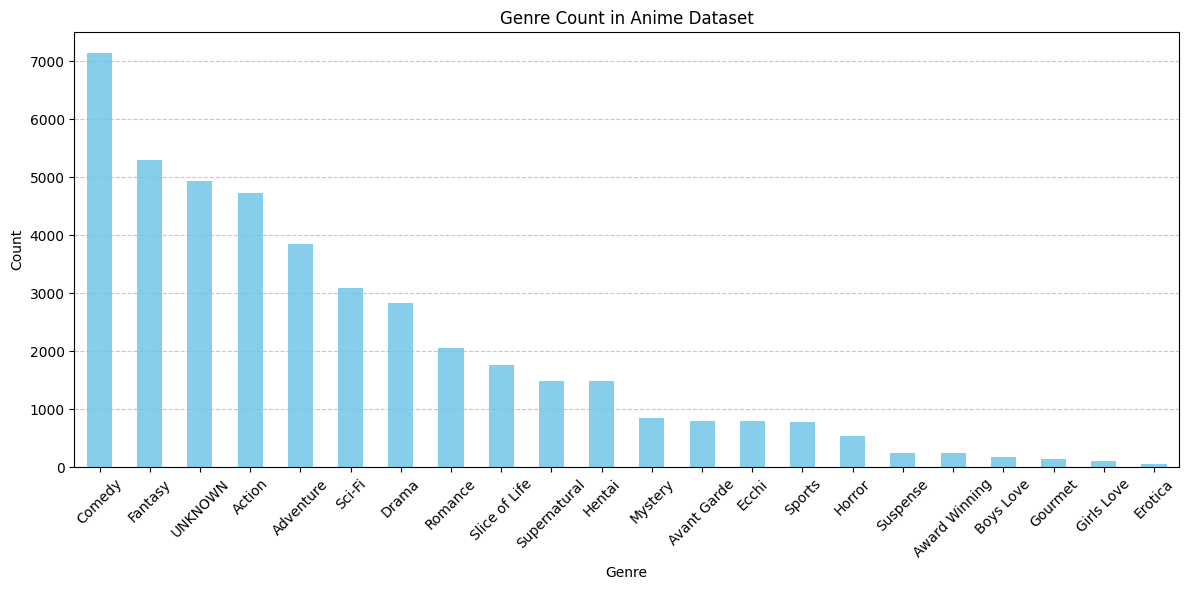

In [ ]:
anime_df['Genres'] = anime_df['Genres'].replace(missing_values, 'UNKNOWN')
all_genres = anime_df['Genres'].str.split(',').explode().str.strip()
genre_counts = all_genres.value_counts()
print(genre_counts)
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Count in Anime Dataset')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Unique Values and Counts in 'Type': [['TV', 7597], ['Movie', 4381], ['OVA', 4076], ['ONA', 3533], ['Music', 2686], ['Special', 2558], ['UNKNOWN', 74]]


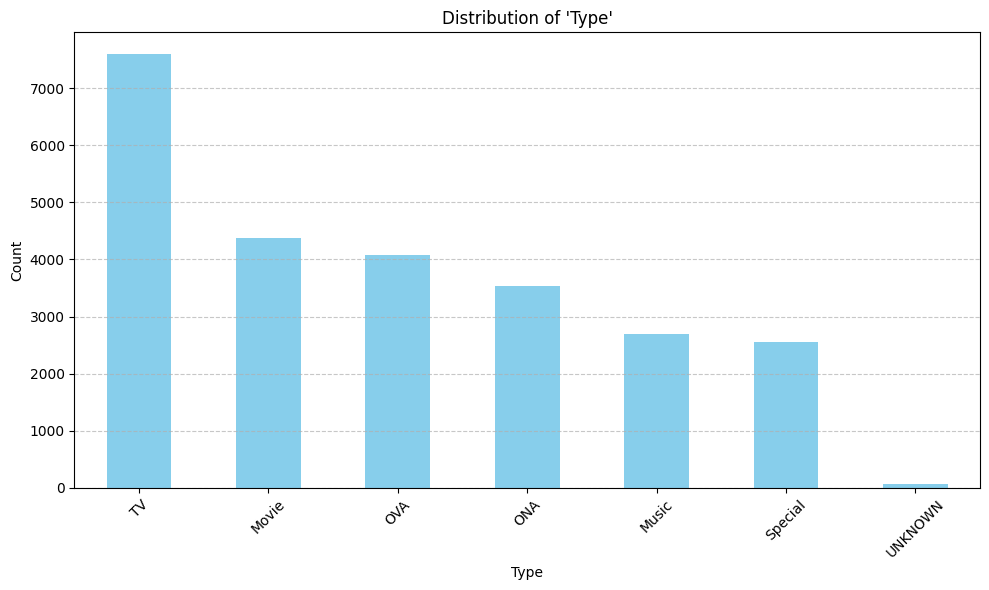

In [ ]:
type_counts = anime_df['Type'].value_counts()
type_list = type_counts.reset_index().values.tolist()
print("Unique Values and Counts in 'Type':", type_list)
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of 'Type'")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Frequency Distribution by Category:
Episodes
1-25      20036
26-50      2298
51-100     1492
100+        468
Name: count, dtype: int64


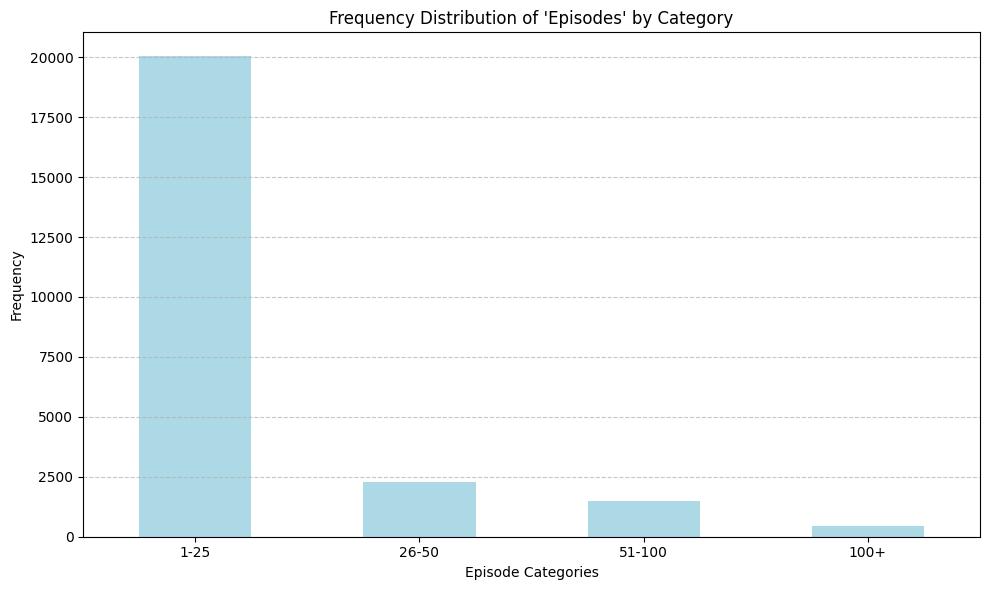

In [ ]:
temp_episodes = pd.to_numeric(anime_df['Episodes'], errors='coerce')

bins = [0, 25, 50, 100, np.inf]
labels = ['1-25', '26-50', '51-100', '100+']

episode_categories = pd.cut(temp_episodes, bins=bins, labels=labels, right=True)

category_counts = episode_categories.value_counts().sort_index()

print("Frequency Distribution by Category:")
print(category_counts)

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='lightblue')
plt.title("Frequency Distribution of 'Episodes' by Category")
plt.xlabel("Episode Categories")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Unique Values in 'Status' column:
Status
Finished Airing     24070
Not yet aired         488
Currently Airing      347
Name: count, dtype: int64


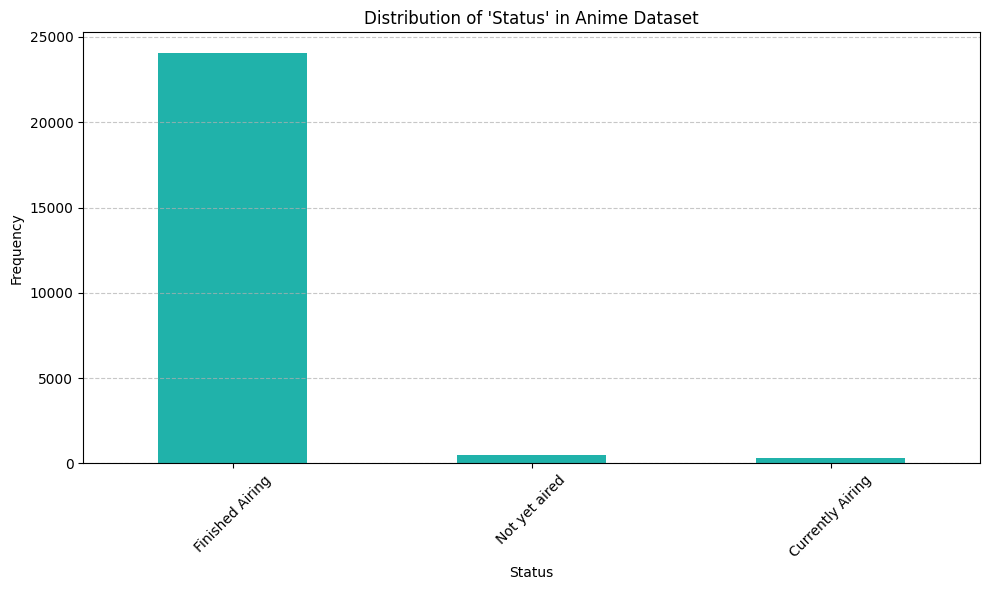

In [ ]:

status_counts = anime_df['Status'].value_counts()

print("Unique Values in 'Status' column:")
print(status_counts)

plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='lightseagreen')
plt.title("Distribution of 'Status' in Anime Dataset")
plt.xlabel("Status")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Unique Values in 'Rating' column:
Rating
PG-13 - Teens 13 or older         8502
G - All Ages                      7660
PG - Children                     4050
Rx - Hentai                       1475
R - 17+ (violence & profanity)    1414
R+ - Mild Nudity                  1135
UNKNOWN                            669
Name: count, dtype: int64


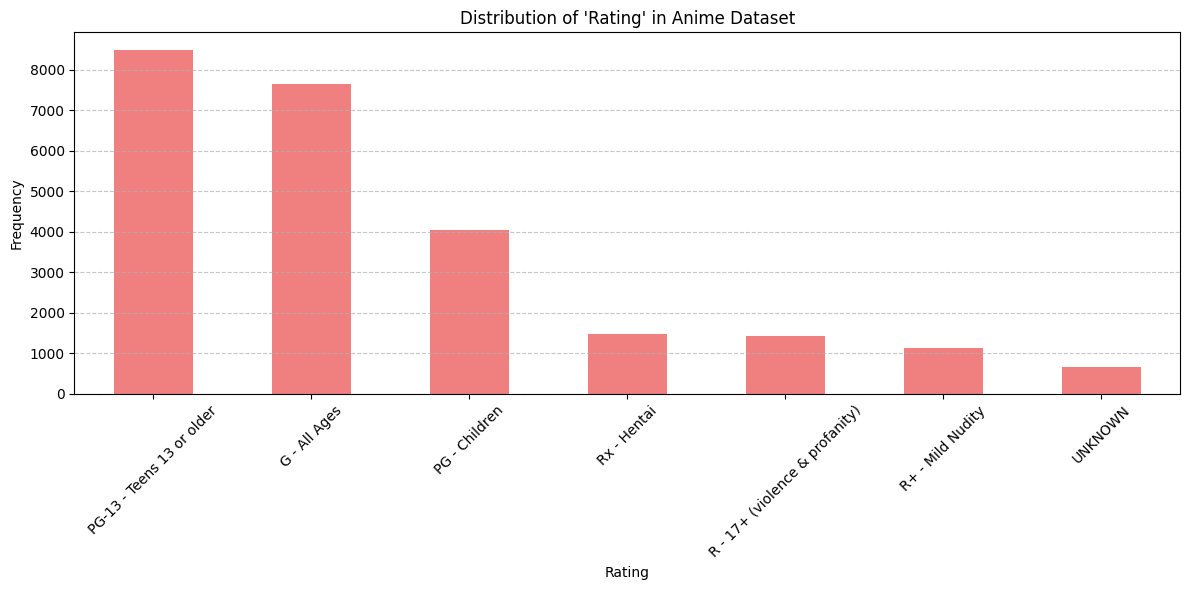

In [ ]:
rating_counts = anime_df['Rating'].value_counts()

print("Unique Values in 'Rating' column:")
print(rating_counts)

plt.figure(figsize=(12, 6))
rating_counts.plot(kind='bar', color='lightcoral')
plt.title("Distribution of 'Rating' in Anime Dataset")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Summary Statistics for Numerical Columns:
               Rank    Popularity      Favorites     Scored By       Members
count  24905.000000  24905.000000   24905.000000  2.490500e+04  2.490500e+04
mean    8116.197912  12265.388356     432.595222  1.888608e+04  3.710496e+04
std     6551.564504   7187.428393    4353.181647  9.393985e+04  1.568252e+05
min        0.000000      0.000000       0.000000  0.000000e+00  0.000000e+00
25%     1427.000000   6040.000000       0.000000  0.000000e+00  2.090000e+02
50%     7652.000000  12265.000000       1.000000  2.920000e+02  1.056000e+03
75%    13882.000000  18491.000000      18.000000  3.345000e+03  9.326000e+03
max    20104.000000  24723.000000  217606.000000  2.660903e+06  3.744541e+06


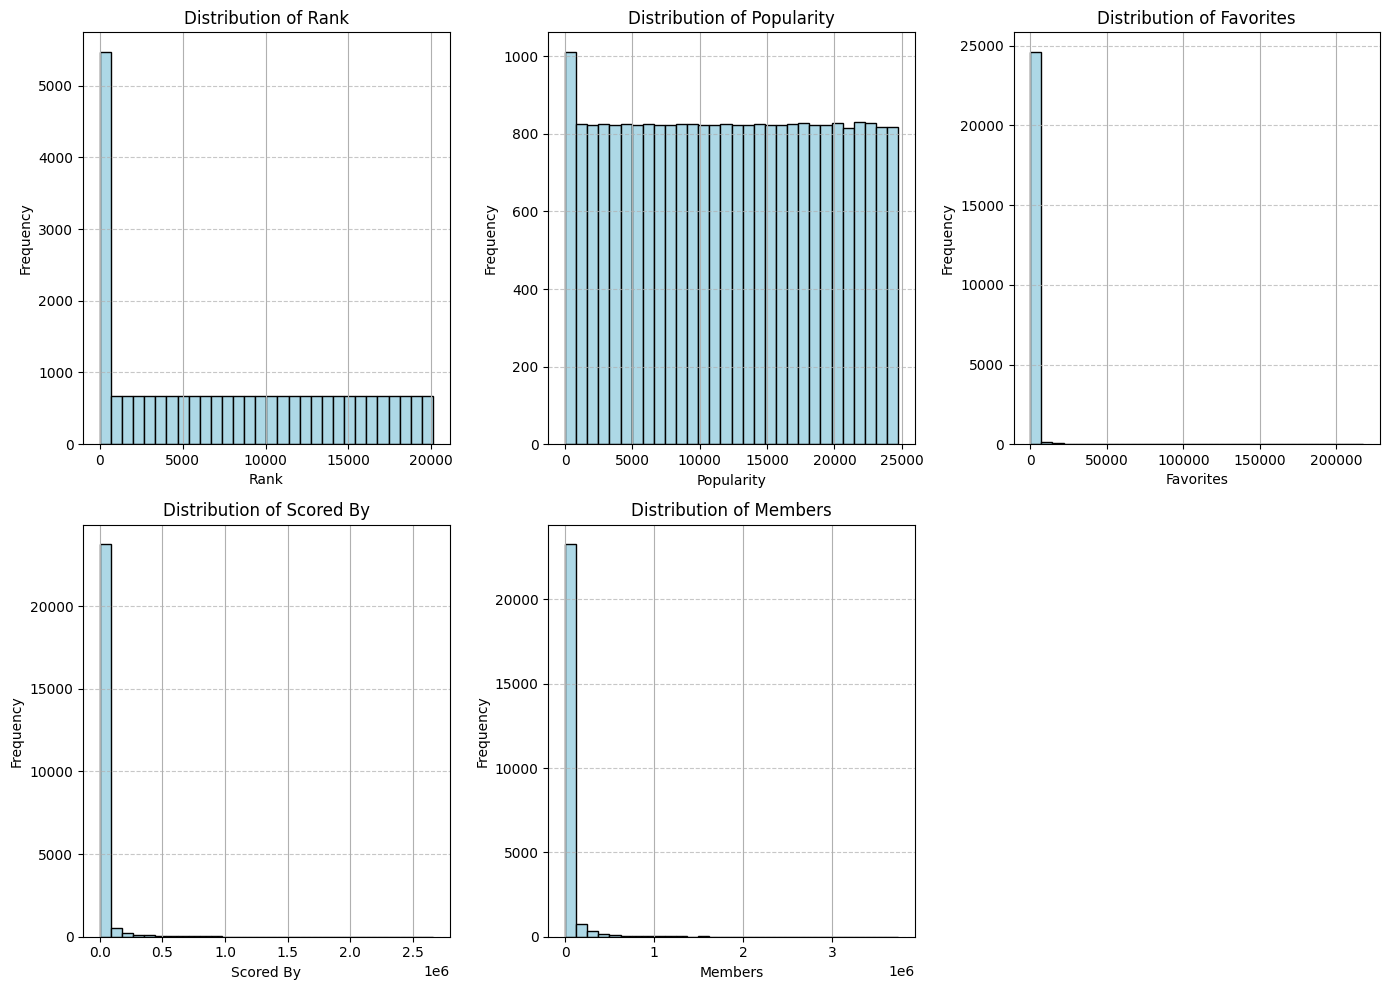

In [ ]:
cols_to_check = ['Rank', 'Popularity', 'Favorites', 'Scored By', 'Members']

print("Summary Statistics for Numerical Columns:")
print(anime_df[cols_to_check].describe())


plt.figure(figsize=(14, 10))

for i, col in enumerate(cols_to_check, 1):
    plt.subplot(2, 3, i)
    anime_df[col].dropna().hist(bins=30, color='lightblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Total number of unique studios: 1547


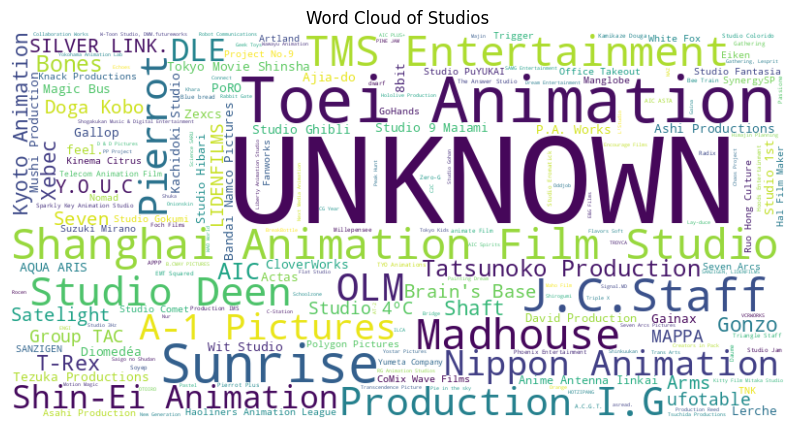

In [ ]:
unique_studios_count = anime_df['Studios'].nunique()
print(f"Total number of unique studios: {unique_studios_count}")
studio_counts = anime_df['Studios'].value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(studio_counts.to_dict())
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Studios")
plt.show()

Unique Values in 'Source' column and their counts:
Source
Original        9622
Manga           4687
UNKNOWN         3689
Game            1232
Visual novel    1107
Other           1008
Light novel      968
Novel            709
Web manga        447
Music            395
4-koma manga     314
Picture book     210
Book             191
Mixed media      162
Web novel         82
Card game         68
Radio             14
Name: count, dtype: int64


<ipython-input-90-72798f4826b6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=anime_df, x='Source', order=source_counts.index, palette='viridis')


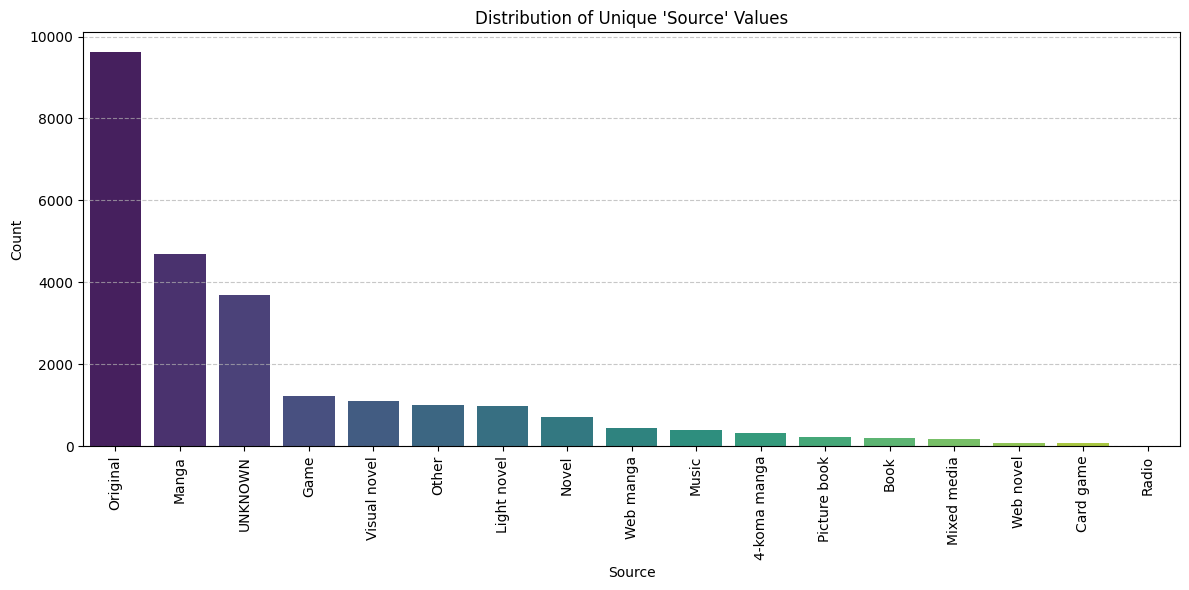

In [ ]:
source_counts = anime_df['Source'].value_counts()
print("Unique Values in 'Source' column and their counts:")
print(source_counts)

plt.figure(figsize=(12, 6))
sns.countplot(data=anime_df, x='Source', order=source_counts.index, palette='viridis')
plt.title("Distribution of Unique 'Source' Values")
plt.xlabel("Source")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-92-62c05b91472f>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=anime_df, x='Source', order=source_counts.index, palette='viridis')


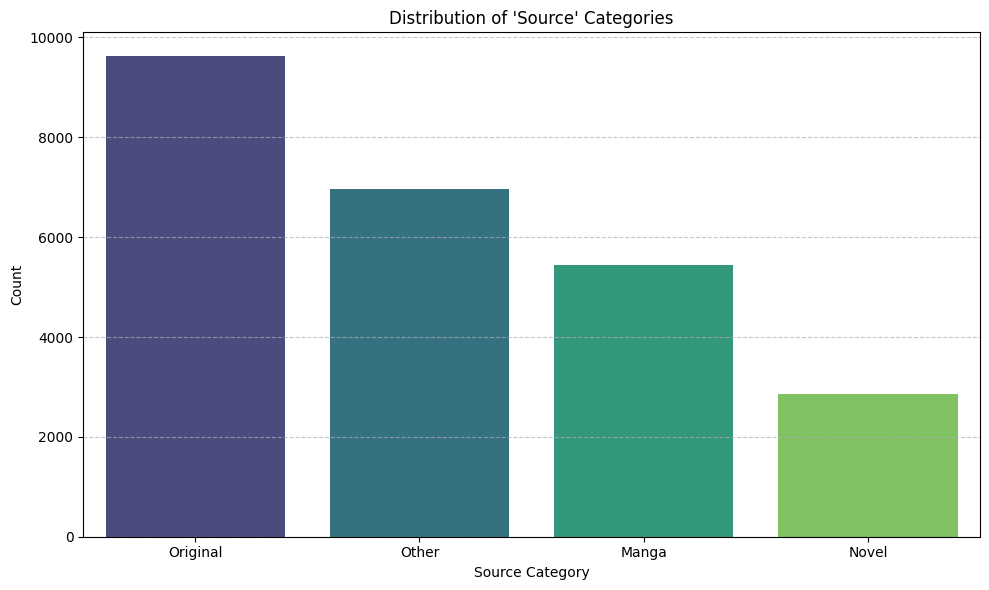

Updated Distribution of 'Source' Categories:
Source
Original    9622
Other       6969
Manga       5448
Novel       2866
Name: count, dtype: int64


In [ ]:
source_mapping = {
    'Original': 'Original',
    'Manga': 'Manga',
    'Web manga': 'Manga',
    '4-koma manga': 'Manga',
    'Novel': 'Novel',
    'Visual novel': 'Novel',
    'Web novel': 'Novel',
    'Light novel': 'Novel',
    'Unknown': 'UNKNOWN',
    'Game': 'Other',
    'Other': 'Other',
    'Music': 'Other',
    'Picture book': 'Other',
    'Book': 'Other',
    'Mixed media': 'Other',
    'Card game': 'Other',
    'Radio': 'Other'
}


anime_df['Source'] = anime_df['Source'].map(source_mapping).fillna('Other')
source_counts = anime_df['Source'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=anime_df, x='Source', order=source_counts.index, palette='viridis')
plt.title("Distribution of 'Source' Categories")
plt.xlabel("Source Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Updated Distribution of 'Source' Categories:")
print(source_counts)

In [ ]:
anime_df.to_csv('Animes2023.csv', index=False)

2. **Users 2023 Dataset**

In [ ]:
users_df=pd.read_csv("/content/myanimelist-dataset/users-details-2023.csv")

In [ ]:
users_df.sample(10)

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
94932,99916,BlankPage,NaN,NaN,NaN,2008-09-29T00:00:00+00:00,17.1,9.63,2.0,40.0,0.0,0.0,27.0,69.0,0.0,1038.0
552955,792721,ArcHive_08,Male,NaN,Pinas,2011-10-22T00:00:00+00:00,1.0,9.00,0.0,2.0,0.0,0.0,0.0,2.0,0.0,62.0
174673,187207,Trinitysx,NaN,NaN,NaN,2009-05-27T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185134,205898,berrykitty,NaN,NaN,NaN,2009-07-11T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
292472,350445,HakuoukiFan,NaN,NaN,NaN,2010-07-04T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573977,877645,prestondonov1230,NaN,NaN,NaN,2011-11-04T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720175,1255691,Laeste,NaN,NaN,NaN,2012-04-16T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470544,561443,shinely,NaN,NaN,NaN,2011-08-31T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182195,199812,deathnoteL,NaN,NaN,NaN,2009-06-28T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198445,234278,goodyjoel,NaN,NaN,NaN,2009-09-14T00:00:00+00:00,0.4,10.00,0.0,2.0,0.0,0.0,0.0,2.0,0.0,24.0


In [ ]:
users_df.columns

Index(['Mal ID', 'Username', 'Gender', 'Birthday', 'Location', 'Joined',
       'Days Watched', 'Mean Score', 'Watching', 'Completed', 'On Hold',
       'Dropped', 'Plan to Watch', 'Total Entries', 'Rewatched',
       'Episodes Watched'],
      dtype='object')

In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731290 entries, 0 to 731289
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Mal ID            731290 non-null  int64  
 1   Username          731289 non-null  object 
 2   Gender            224383 non-null  object 
 3   Birthday          168068 non-null  object 
 4   Location          152805 non-null  object 
 5   Joined            731290 non-null  object 
 6   Days Watched      731282 non-null  float64
 7   Mean Score        731282 non-null  float64
 8   Watching          731282 non-null  float64
 9   Completed         731282 non-null  float64
 10  On Hold           731282 non-null  float64
 11  Dropped           731282 non-null  float64
 12  Plan to Watch     731282 non-null  float64
 13  Total Entries     731282 non-null  float64
 14  Rewatched         731282 non-null  float64
 15  Episodes Watched  731282 non-null  float64
dtypes: float64(10), int6

In [ ]:
users_df.isnull().sum()

,0
Mal ID,0
Username,1
Gender,506907
Birthday,563222
Location,578485
Joined,0
Days Watched,8
Mean Score,8
Watching,8
Completed,8


In [ ]:
users_df=users_df[['Mal ID','Username','Days Watched','Mean Score','Watching',
                   'Completed','On Hold','Dropped','Plan to Watch','Total Entries',
                   'Rewatched','Episodes Watched']]

In [ ]:
users_df.columns

Index(['Mal ID', 'Username', 'Days Watched', 'Mean Score', 'Watching',
       'Completed', 'On Hold', 'Dropped', 'Plan to Watch', 'Total Entries',
       'Rewatched', 'Episodes Watched'],
      dtype='object')

In [ ]:
users_df.isnull().sum()

,0
Mal ID,0
Username,1
Days Watched,8
Mean Score,8
Watching,8
Completed,8
On Hold,8
Dropped,8
Plan to Watch,8
Total Entries,8


In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731290 entries, 0 to 731289
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Mal ID            731290 non-null  int64  
 1   Username          731289 non-null  object 
 2   Days Watched      731282 non-null  float64
 3   Mean Score        731282 non-null  float64
 4   Watching          731282 non-null  float64
 5   Completed         731282 non-null  float64
 6   On Hold           731282 non-null  float64
 7   Dropped           731282 non-null  float64
 8   Plan to Watch     731282 non-null  float64
 9   Total Entries     731282 non-null  float64
 10  Rewatched         731282 non-null  float64
 11  Episodes Watched  731282 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 67.0+ MB


In [ ]:
missing_values = ['UNKNOWN', 'not given', 'not available', 'MISSING', 'missing', 'unknown', 'Missing', 'Unknown']

users_df['Username'] = users_df['Username'].replace(missing_values, 'UNKNOWN')

cols_to_convert = ['Days Watched', 'Mean Score', 'Watching', 'Completed', 'On Hold', 'Dropped', 'Plan to Watch',
                   'Total Entries', 'Rewatched', 'Episodes Watched']

users_df[cols_to_convert] = users_df[cols_to_convert].astype('float64')

users_df[cols_to_convert] = users_df[cols_to_convert].fillna(0)

print(users_df.dtypes)
print(users_df.head())

Mal ID                int64
Username             object
Days Watched        float64
Mean Score          float64
Watching            float64
Completed           float64
On Hold             float64
Dropped             float64
Plan to Watch       float64
Total Entries       float64
Rewatched           float64
Episodes Watched    float64
dtype: object
   Mal ID Username  Days Watched  Mean Score  Watching  Completed  On Hold  \
0       1    Xinil         142.3        7.37       1.0      233.0      8.0   
1       3  Aokaado          68.6        7.34      23.0      137.0     99.0   
2       4  Crystal         212.8        6.68      16.0      636.0    303.0   
3       9   Arcane          30.0        7.71       5.0       54.0      4.0   
4      18      Mad          52.0        6.27       1.0      114.0     10.0   

   Dropped  Plan to Watch  Total Entries  Rewatched  Episodes Watched  
0     93.0           64.0          399.0       60.0            8458.0  
1     44.0           40.0          34

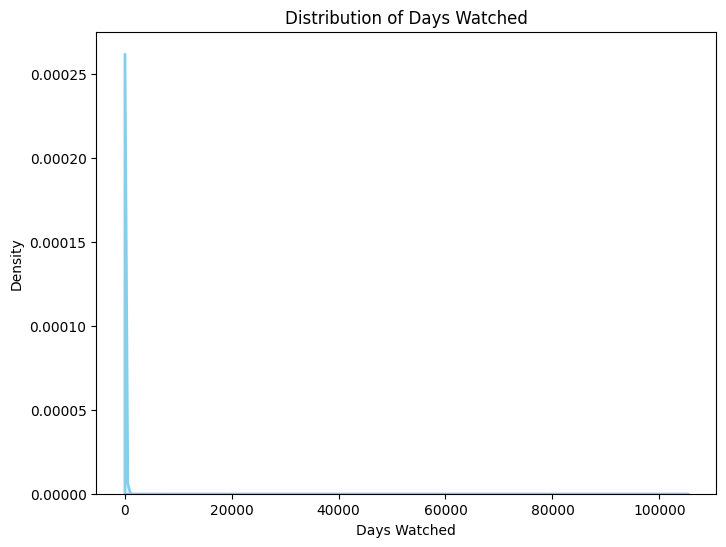

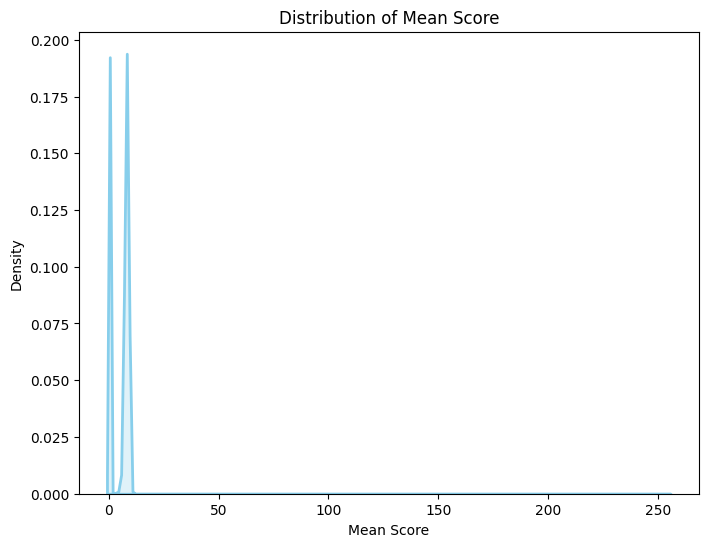

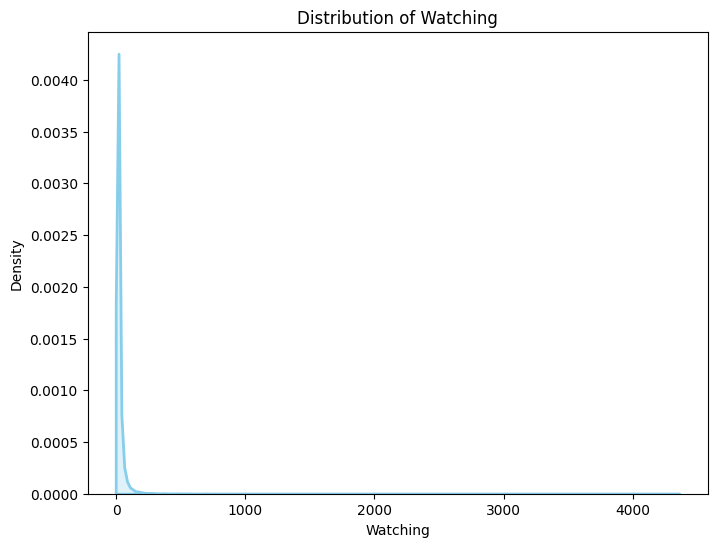

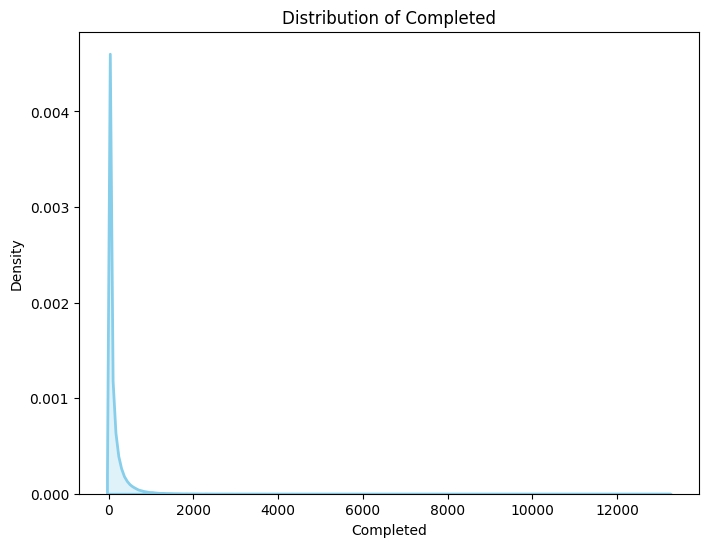

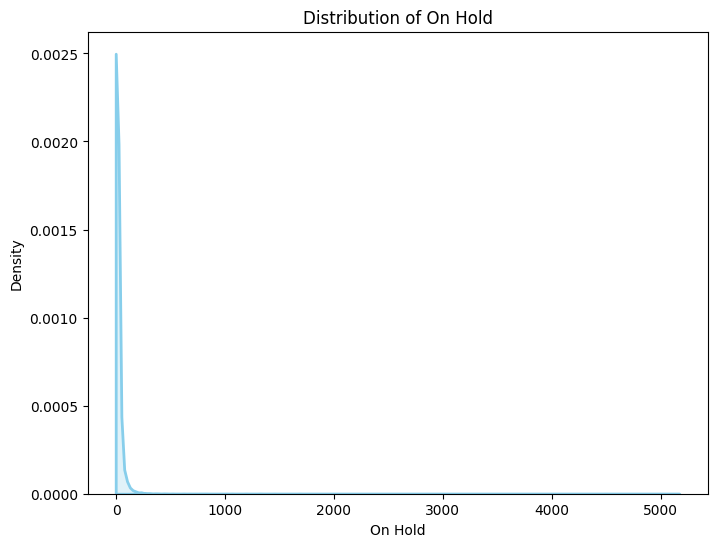

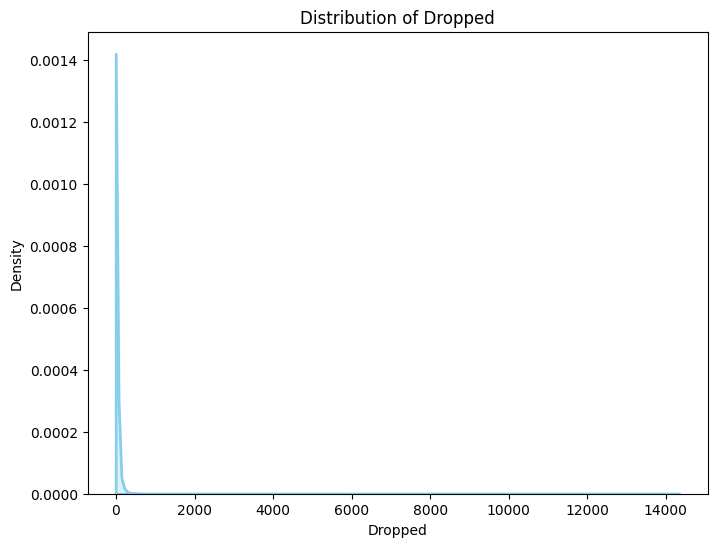

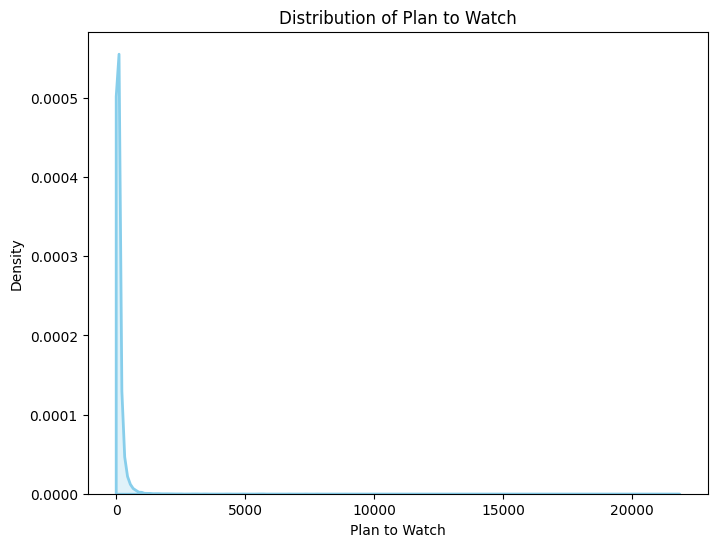

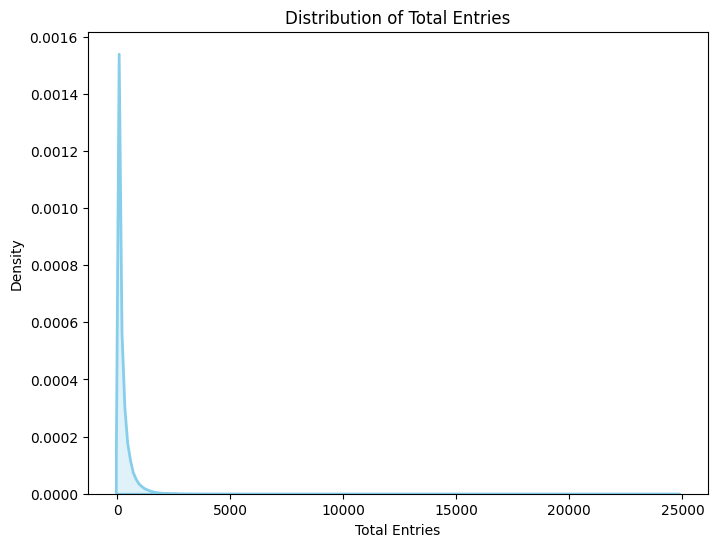

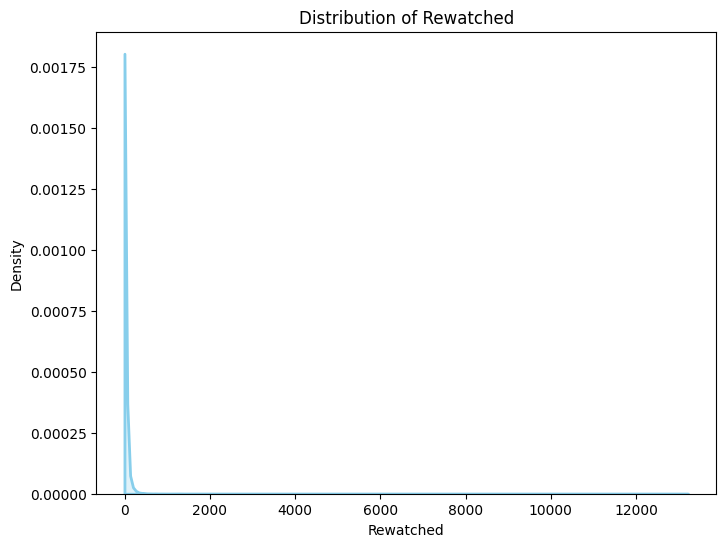

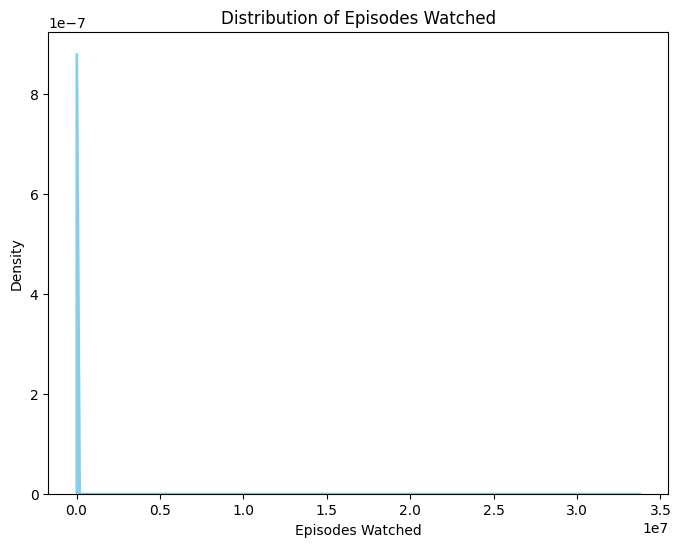

In [ ]:
columns_to_plot = ['Days Watched', 'Mean Score', 'Watching', 'Completed', 'On Hold',
                   'Dropped', 'Plan to Watch', 'Total Entries', 'Rewatched', 'Episodes Watched']

for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(users_df[column], fill=True, color='skyblue', linewidth=2)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

In [ ]:
zero_counts = {}
for column in users_df.columns:
    if column != 'Username':
        zero_count = (users_df[column] == 0).sum()
        zero_counts[column] = zero_count

for column, count in zero_counts.items():
    print(f"Column: {column}, Zeros: {count}")

Column: Mal ID, Zeros: 0
Column: Days Watched, Zeros: 356120
Column: Mean Score, Zeros: 376204
Column: Watching, Zeros: 406521
Column: Completed, Zeros: 369399
Column: On Hold, Zeros: 531308
Column: Dropped, Zeros: 539669
Column: Plan to Watch, Zeros: 472255
Column: Total Entries, Zeros: 340250
Column: Rewatched, Zeros: 590491
Column: Episodes Watched, Zeros: 352115


In [ ]:
cols_to_check = ['Days Watched', 'Mean Score', 'Completed', 'Total Entries', 'Episodes Watched']
users_df = users_df[~(users_df[cols_to_check] == 0).any(axis=1)]
print(users_df.head())

   Mal ID Username  Days Watched  Mean Score  Watching  Completed  On Hold  \
0       1    Xinil         142.3        7.37       1.0      233.0      8.0   
1       3  Aokaado          68.6        7.34      23.0      137.0     99.0   
2       4  Crystal         212.8        6.68      16.0      636.0    303.0   
3       9   Arcane          30.0        7.71       5.0       54.0      4.0   
4      18      Mad          52.0        6.27       1.0      114.0     10.0   

   Dropped  Plan to Watch  Total Entries  Rewatched  Episodes Watched  
0     93.0           64.0          399.0       60.0            8458.0  
1     44.0           40.0          343.0       15.0            4072.0  
2      0.0           45.0         1000.0       10.0           12781.0  
3      3.0            0.0           66.0        0.0            1817.0  
4      5.0           23.0          153.0       42.0            3038.0  


In [ ]:
users_df.shape

(336734, 12)

In [ ]:
zero_counts = {}

for column in users_df.columns:
    if column != 'Username':
        zero_count = (users_df[column] == 0).sum()
        zero_counts[column] = zero_count

for column, count in zero_counts.items():
    print(f"Column: {column}, Zeros: {count}")

Column: Mal ID, Zeros: 0
Column: Days Watched, Zeros: 0
Column: Mean Score, Zeros: 0
Column: Watching, Zeros: 52921
Column: Completed, Zeros: 0
Column: On Hold, Zeros: 149113
Column: Dropped, Zeros: 154553
Column: Plan to Watch, Zeros: 101145
Column: Total Entries, Zeros: 0
Column: Rewatched, Zeros: 200832
Column: Episodes Watched, Zeros: 0


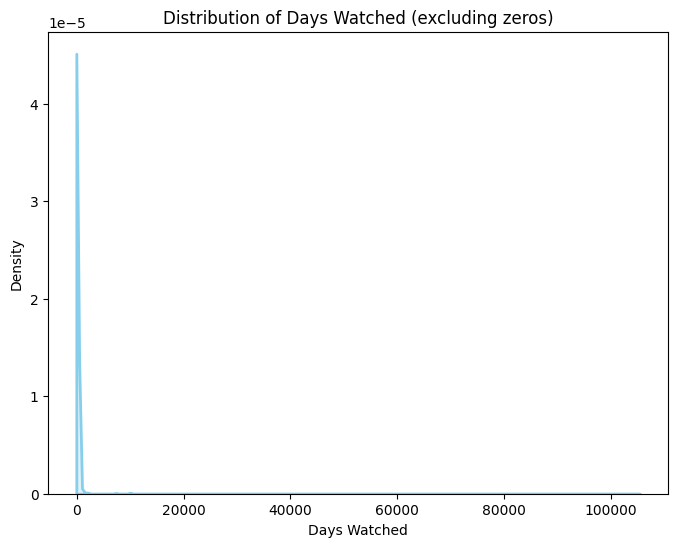

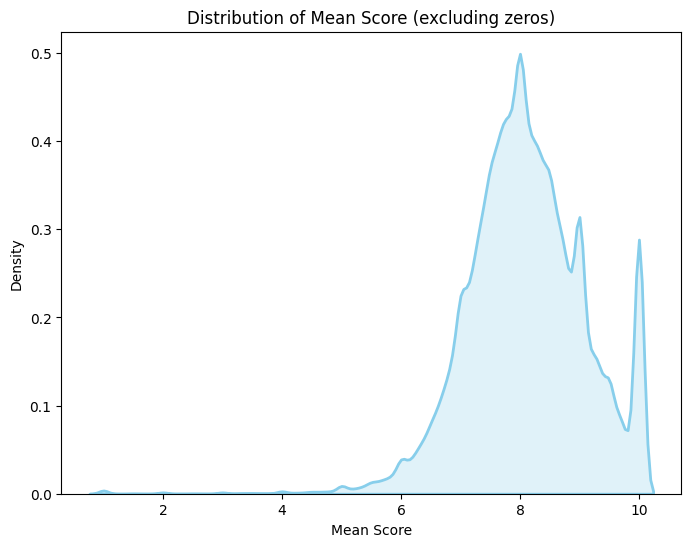

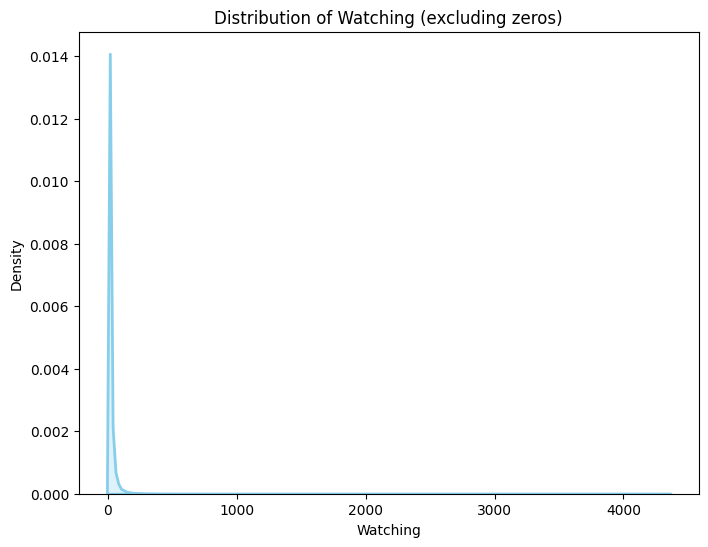

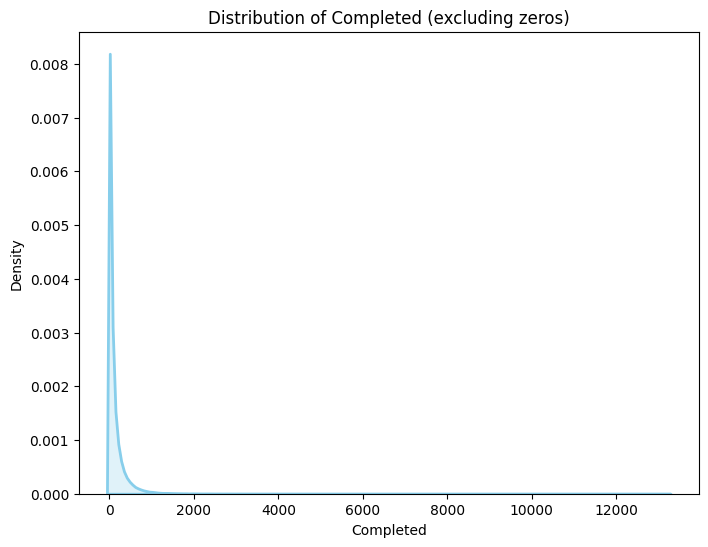

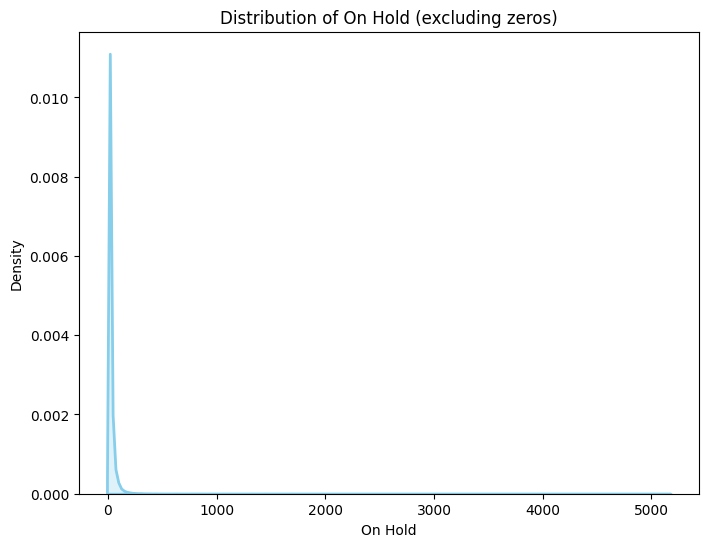

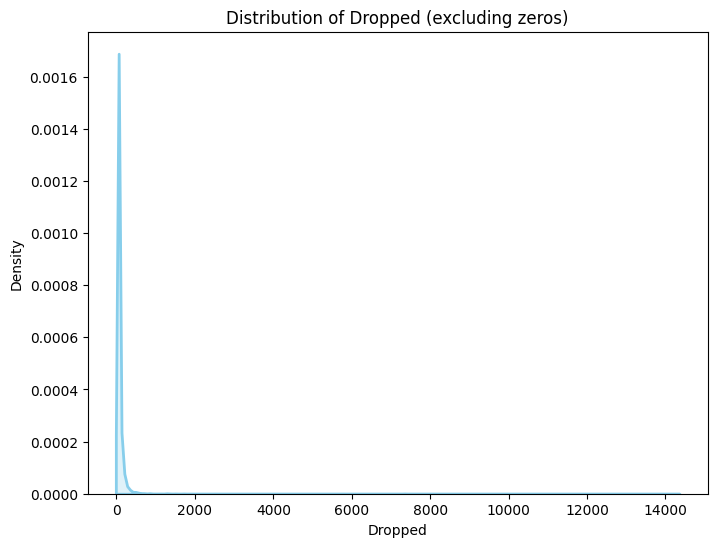

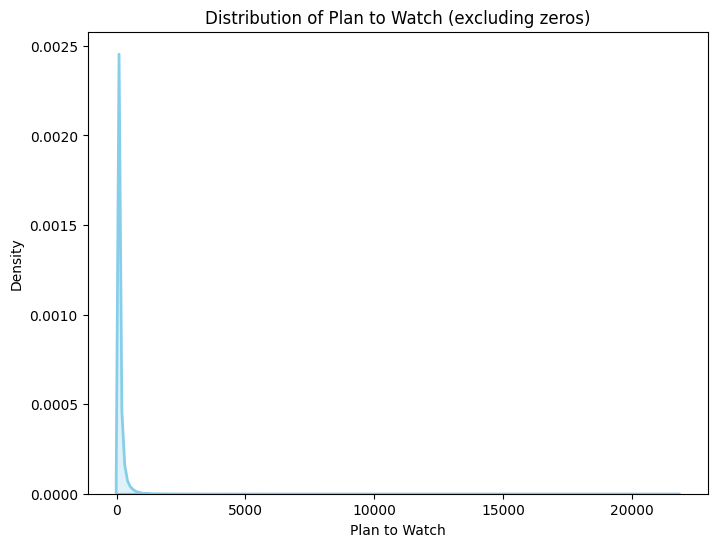

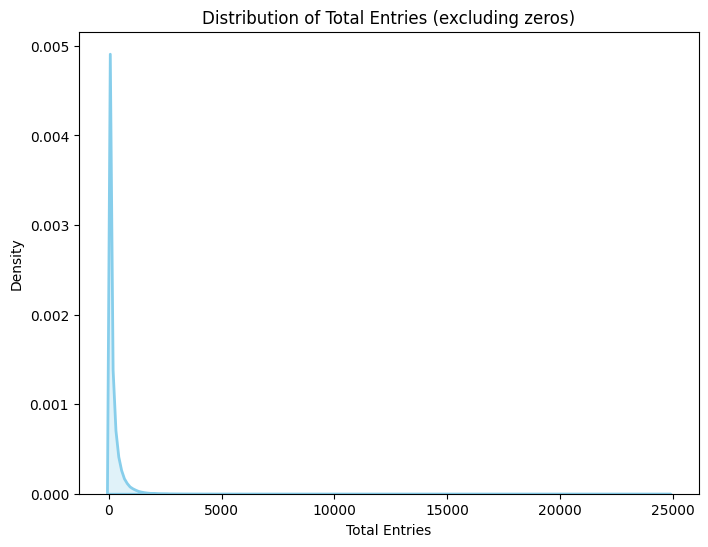

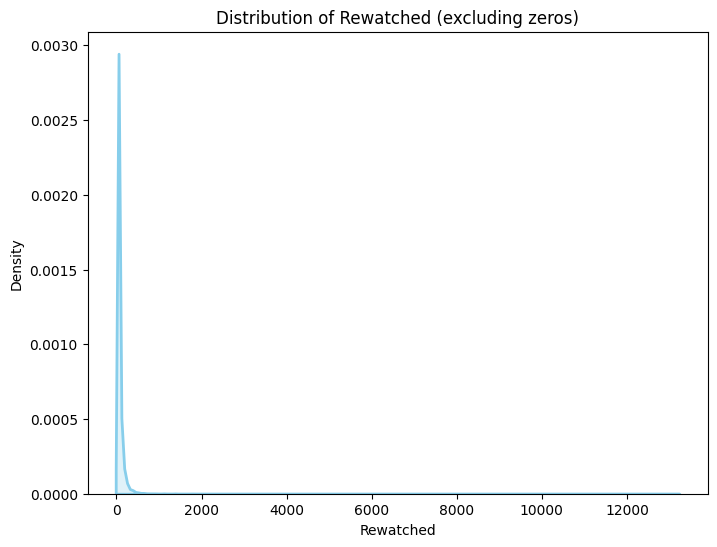

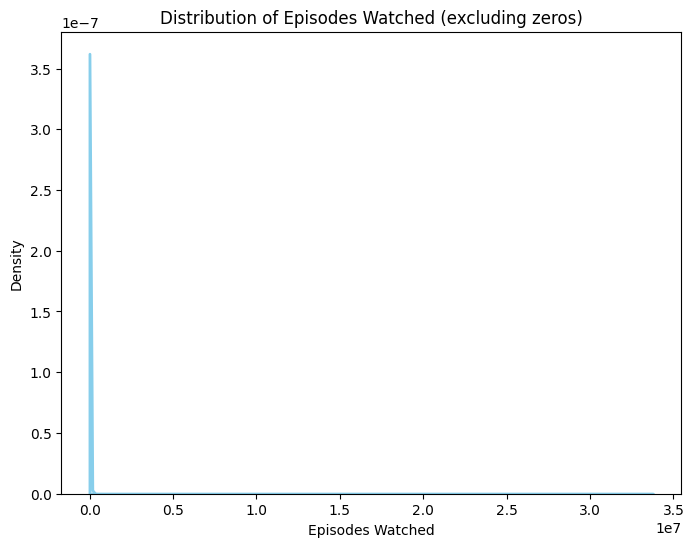

In [ ]:
columns_to_plot = ['Days Watched', 'Mean Score', 'Watching', 'Completed', 'On Hold',
                   'Dropped', 'Plan to Watch', 'Total Entries', 'Rewatched', 'Episodes Watched']

for column in columns_to_plot:

    filtered_data = users_df[users_df[column] != 0][column]

    plt.figure(figsize=(8, 6))

    sns.kdeplot(filtered_data, fill=True, color='skyblue', linewidth=2)

    plt.title(f'Distribution of {column} (excluding zeros)')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

In [ ]:
users_df.to_csv('Users2023.csv', index=False)

3. **User - Details 2023**

In [ ]:
users_score_df=pd.read_csv("/content/myanimelist-dataset/users-score-2023.csv")

In [ ]:
users_score_df.sample(10)

,user_id,Username,anime_id,Anime Title,rating
10591353,355437,JokoShuromi,1840,Zero no Tsukaima: Futatsuki no Kishi,8
12607217,397448,Lonewolf13,8985,Yojouhan Shinwa Taikei Specials,5
1795455,23874,madpierrot,13441,Shiawasette Naani,2
14421425,440254,klaymore,237,Koukyoushihen Eureka Seven,8
5129584,79649,Yuki-ness,199,Sen to Chihiro no Kamikakushi,9
4978138,76970,Soffice2,1575,Code Geass: Hangyaku no Lelouch,10
518947,6140,trafagibr,18121,Teekyuu 2,7
19827396,711169,LLXIII,90,Shin Kidou Senki Gundam Wing,7
19641112,630733,imakoo,5081,Bakemonogatari,5
11142825,366797,LeMoN_,738,MÄR,7


In [ ]:
users_score_df.isnull().sum()

,0
user_id,0
Username,232
anime_id,0
Anime Title,0
rating,0


In [ ]:
users_score_df.columns

Index(['user_id', 'Username', 'anime_id', 'Anime Title', 'rating'], dtype='object')

In [ ]:
users_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24325191 entries, 0 to 24325190
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   Username     object
 2   anime_id     int64 
 3   Anime Title  object
 4   rating       int64 
dtypes: int64(3), object(2)
memory usage: 927.9+ MB


In [ ]:
users_score_df = users_score_df.drop(columns=['Username', 'Anime Title'])
users_score_df = users_score_df.astype('float64')

<ipython-input-144-268e5786ffd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=users_score_df, palette='coolwarm')


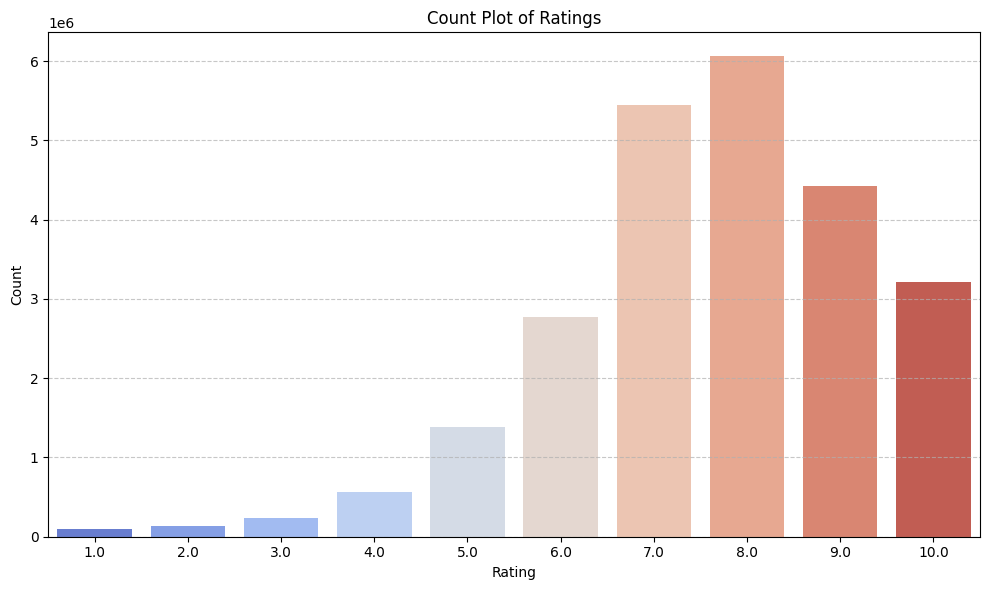

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=users_score_df, palette='coolwarm')
plt.title('Count Plot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
users_score_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Anime Recommendation Engine/Anime Datasets/UsersScores2023.csv', index=False)

Remove Explicit Genres from all the datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
anime_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Anime Recommendation Engine/Anime Datasets/Animes2023.csv')

In [ ]:
anime_df.sample(10)

,anime_id,Name,English name,Score,Genres,Synopsis,Type,Episodes,Aired,Status,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Studios,Source
13471,36313.0,Shouka Robo Zeres: Fire Dragon wo Taose!,UNKNOWN,0.00,Sci-Fi,A fire safety anime with a sci-fi mecha flare....,OVA,1.0,1993,Finished Airing,G - All Ages,19788.0,19688.0,0.0,0.0,152.0,https://cdn.myanimelist.net/images/anime/3/877...,UNKNOWN,Original
3002,3403.0,The Guts!,Women at Work,6.30,Hentai,Namamura Akitoshi is a college student who loo...,OVA,2.0,2005,Finished Airing,Rx - Hentai,0.0,6943.0,39.0,3609.0,7127.0,https://cdn.myanimelist.net/images/anime/1809/...,Anime Antenna Iinkai,Novel
300,324.0,Kidou Keisatsu Patlabor: On Television,Patlabor: The Mobile Police - The TV Series,7.67,"Comedy, Sci-Fi","In the future, advanced robotics has created h...",TV,47.0,1989,Finished Airing,PG-13 - Teens 13 or older,1212.0,3461.0,414.0,9650.0,36549.0,https://cdn.myanimelist.net/images/anime/7/592...,Sunrise,Original
4192,5567.0,Shachiku: Kuruma no Naka de Kattemasu,UNKNOWN,4.91,Hentai,Based on the game by Arkham Products.,OVA,1.0,2001,Finished Airing,Rx - Hentai,0.0,13250.0,0.0,212.0,828.0,https://cdn.myanimelist.net/images/anime/2/115...,UNKNOWN,Novel
11034,31715.0,Working!!! Lord of the Takanashi,UNKNOWN,8.15,"Comedy, Romance",The light-hearted Working!! franchise comes to...,Special,1.0,2016,Finished Airing,PG-13 - Teens 13 or older,401.0,1930.0,210.0,57047.0,100052.0,https://cdn.myanimelist.net/images/anime/10/79...,A-1 Pictures,Manga
23705,53940.0,Ojarumaru: Mattari Planetarium,UNKNOWN,0.00,"Adventure, Comedy, Fantasy, Sci-Fi",No description available for this anime.,Movie,1.0,2005,Finished Airing,G - All Ages,18648.0,22686.0,0.0,0.0,52.0,https://cdn.myanimelist.net/images/anime/1448/...,UNKNOWN,Original
15806,40001.0,Schoolyard,UNKNOWN,5.44,Avant Garde,Space Shower TV Station ID directed by Kouhei ...,Special,1.0,2018,Finished Airing,G - All Ages,10965.0,13946.0,1.0,375.0,665.0,https://cdn.myanimelist.net/images/anime/1033/...,Suspenders,Original
2102,2299.0,Uchuu no Kishi Tekkaman Blade OVA: Burning Clock,Tekkaman Blade: Burning Clock,6.54,"Action, Sci-Fi","The first OVA, Burning Clock, tells the story ...",OVA,1.0,1999,Finished Airing,R - 17+ (violence & profanity),6162.0,10325.0,1.0,822.0,2241.0,https://cdn.myanimelist.net/images/anime/2/178...,Tatsunoko Production,Original
11673,33129.0,Joker Game: Kuroneko Yoru no Bouken,UNKNOWN,6.67,Drama,Specials included with the Blu-ray box set rel...,Special,2.0,2016,Finished Airing,R - 17+ (violence & profanity),5506.0,5118.0,7.0,5456.0,15019.0,https://cdn.myanimelist.net/images/anime/3/820...,Production I.G,Novel
3144,3586.0,Isaku,UNKNOWN,5.42,Hentai,It's the last day of school before summer vaca...,OVA,3.0,1997,Finished Airing,Rx - Hentai,0.0,10295.0,3.0,783.0,2258.0,https://cdn.myanimelist.net/images/anime/1880/...,"Arms, Triple X",Novel


In [ ]:
condition_1 = anime_df['Rating'] == 'Rx - Hentai'
condition_2 = anime_df['Genres'].str.contains('Hentai', na=False, case=False)
condition_3 = anime_df['Genres'].str.contains('Erotica', na=False, case=False)

drop_conditions = condition_1 | condition_2 | condition_3

anime_df = anime_df[~drop_conditions]

anime_df.reset_index(drop=True, inplace=True)

In [ ]:
anime_df.shape

(23363, 19)

In [ ]:
rating_counts = anime_df['Rating'].value_counts()
print(rating_counts)

Rating
PG-13 - Teens 13 or older         8496
G - All Ages                      7660
PG - Children                     4050
R - 17+ (violence & profanity)    1408
R+ - Mild Nudity                  1081
UNKNOWN                            668
Name: count, dtype: int64


In [ ]:
all_genres = anime_df['Genres'].str.split(',').explode().str.strip()
genre_counts = all_genres.value_counts()
print(genre_counts)

Genres
Comedy           7070
Fantasy          5215
UNKNOWN          4929
Action           4684
Adventure        3826
Sci-Fi           3059
Drama            2777
Romance          2002
Slice of Life    1750
Supernatural     1413
Mystery           841
Avant Garde       797
Ecchi             795
Sports            764
Horror            499
Award Winning     241
Suspense          239
Gourmet           146
Boys Love         123
Girls Love         98
Name: count, dtype: int64


In [ ]:
anime_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Anime Recommendation Engine/Anime Datasets/Animes2023.csv')